In [147]:
# Importing Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,gradient_boosting
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.cluster import DBSCAN,k_means
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso,LassoCV,LinearRegression,Ridge,RidgeCV
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV,KFold,ParameterGrid,train_test_split
#from sklearn.neighbors import kd_tree,KDTree,KNeighborsClassifier
from sklearn.metrics import accuracy_score,auc,classification_report,confusion_matrix,euclidean_distances,euclidean_distances,f1_score
from sklearn.metrics import plot_roc_curve
from  sklearn.pipeline import Pipeline
from sklearn.svm import SVR,SVR
from sklearn.preprocessing import OneHotEncoder,power_transform,StandardScaler
from statsmodels.stats import anova,outliers_influence
import warnings
warnings.filterwarnings('ignore')

In [324]:
# loading the dataset
df=pd.read_csv(r'D:\Datatrained\Practice Project Data Trained\Census Project\census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [325]:
# checking dimentionality
df.shape

# column rows 32560,rows 15

(32560, 15)

In [326]:
#Continueous Feature
#Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week

#Categorical value
#Workclass,Education,Marital_status,Relationship,Race,Sex,Native_country,Education_num


In [327]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [328]:
#dtypes: int64(6), object(9)
#RangeIndex: 32560 entries, 0 to 32559
#Data columns (total 15 columns)

In [329]:
#Cheking null value

df.apply(lambda x: sum(x.isnull()))

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [330]:
# No null value

In [331]:
# Lets look on number of unique value for each of categorical variable
df.apply(lambda x: len(x.unique()))

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [332]:
#Checking value counts of categorical variable

In [333]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

<AxesSubplot:xlabel='Workclass', ylabel='count'>

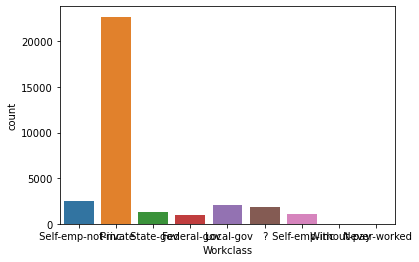

In [334]:
sns.countplot(x='Workclass',data=df)

In [335]:
# ? symbol in Workclass

In [336]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

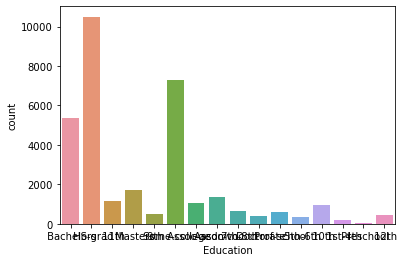

In [337]:
sns.countplot(x='Education',data=df)

In [338]:
df['Age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

In [339]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [340]:
df['Education_num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

In [341]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [342]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [343]:
#?  1843
# occupation has ? symbol

In [344]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

<AxesSubplot:xlabel='Race', ylabel='count'>

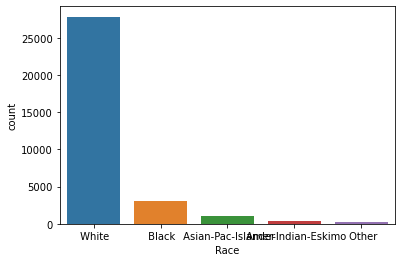

In [345]:
 sns.countplot(x='Race',data=df)

In [346]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

<AxesSubplot:xlabel='Race', ylabel='count'>

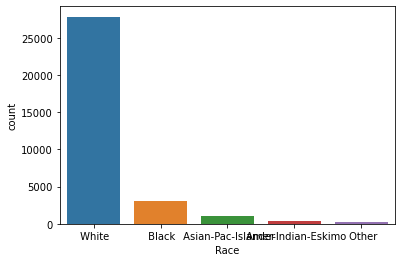

In [347]:
sns.countplot(x='Race',data=df)

In [348]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [349]:
df['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In [350]:
df['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In [351]:
df['Hours_per_week'].value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
94        1
92        1
74        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64

<AxesSubplot:xlabel='Native_country', ylabel='count'>

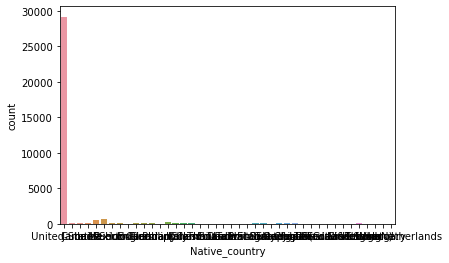

In [352]:
sns.countplot(x='Native_country',data=df)

In [353]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [354]:
 # Native_country has symbol ?  583

In [355]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

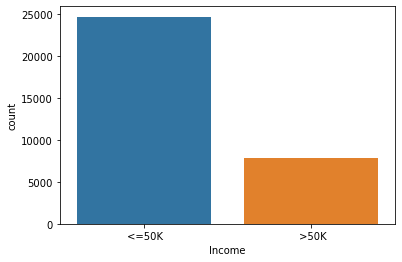

In [356]:
sns.countplot(x='Income',data=df)

In [357]:
#Statistical Analysis
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [358]:
# No missing value for continueou value
# Std is very high,high gap between min and max,zero min value for Capital gain and Capital_loss
#high gap between min and max for Hours_per_week

In [359]:
# Replacing ? 
# Workclass,Occupation,Native_country

#df['Workclass']=df['Workclass'].rename('?':'Prof-specialty')
#df['Occupation']=df['Occupation'].replace('?',0)
#df['Native_country']=df['Native_country'].replace('?',0)

In [360]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [361]:
# Multivariate Analysis
# checking correlation

corr_mat=df.corr() 
corr_mat

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


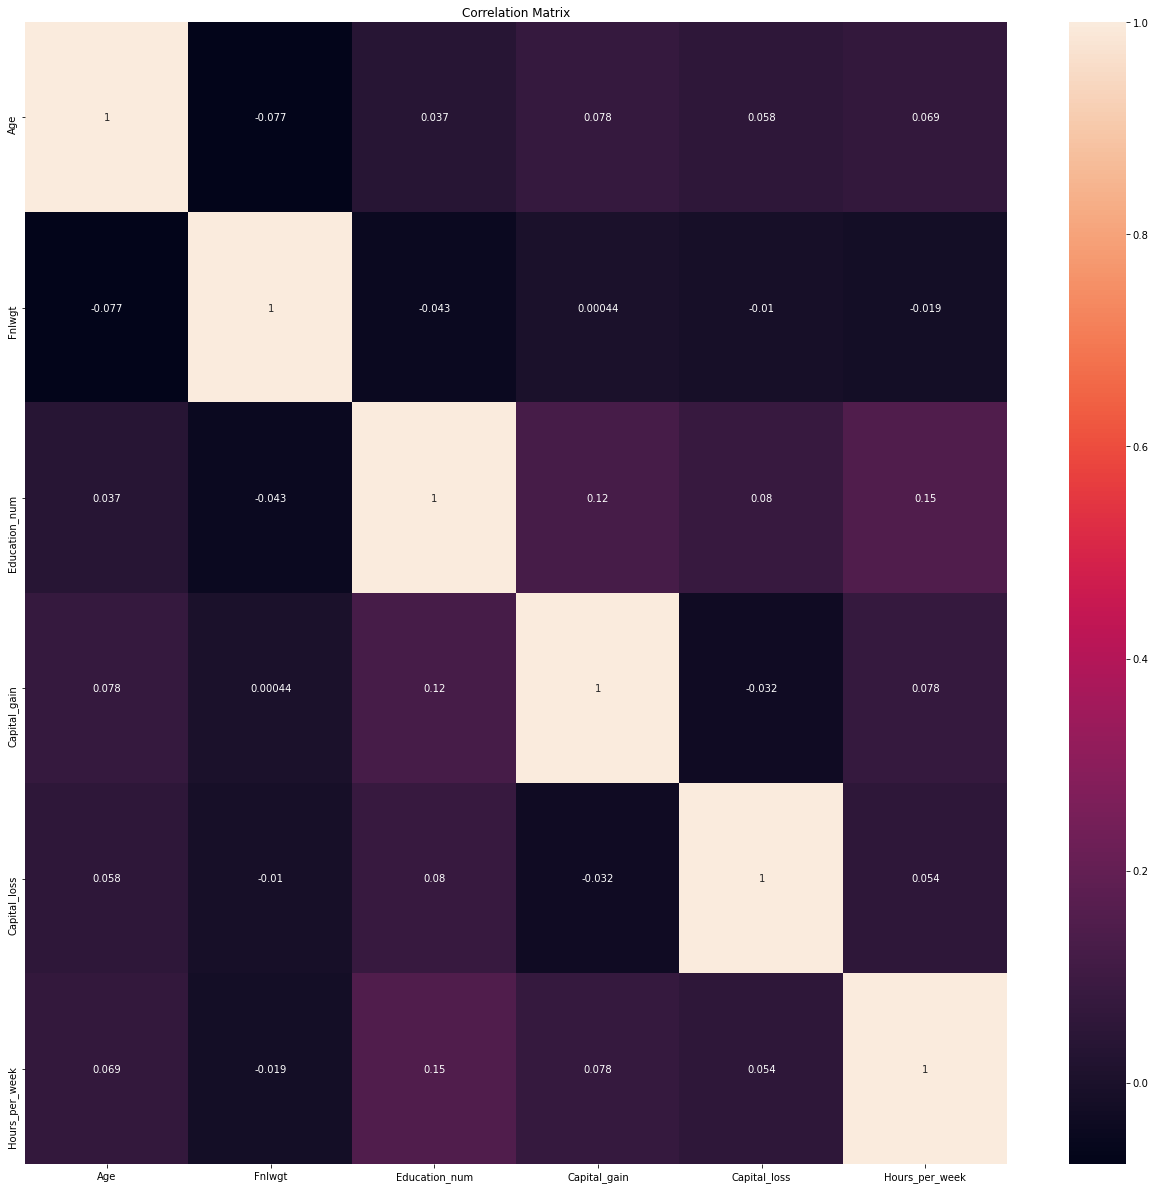

In [362]:
# It is difficut to analyse each feature co-relation in tabular form,lets convert into heat map plot
plt.figure(figsize= [22,21])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [363]:
# No strong co relation observed between two variables

In [364]:
cnt_f=df[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]

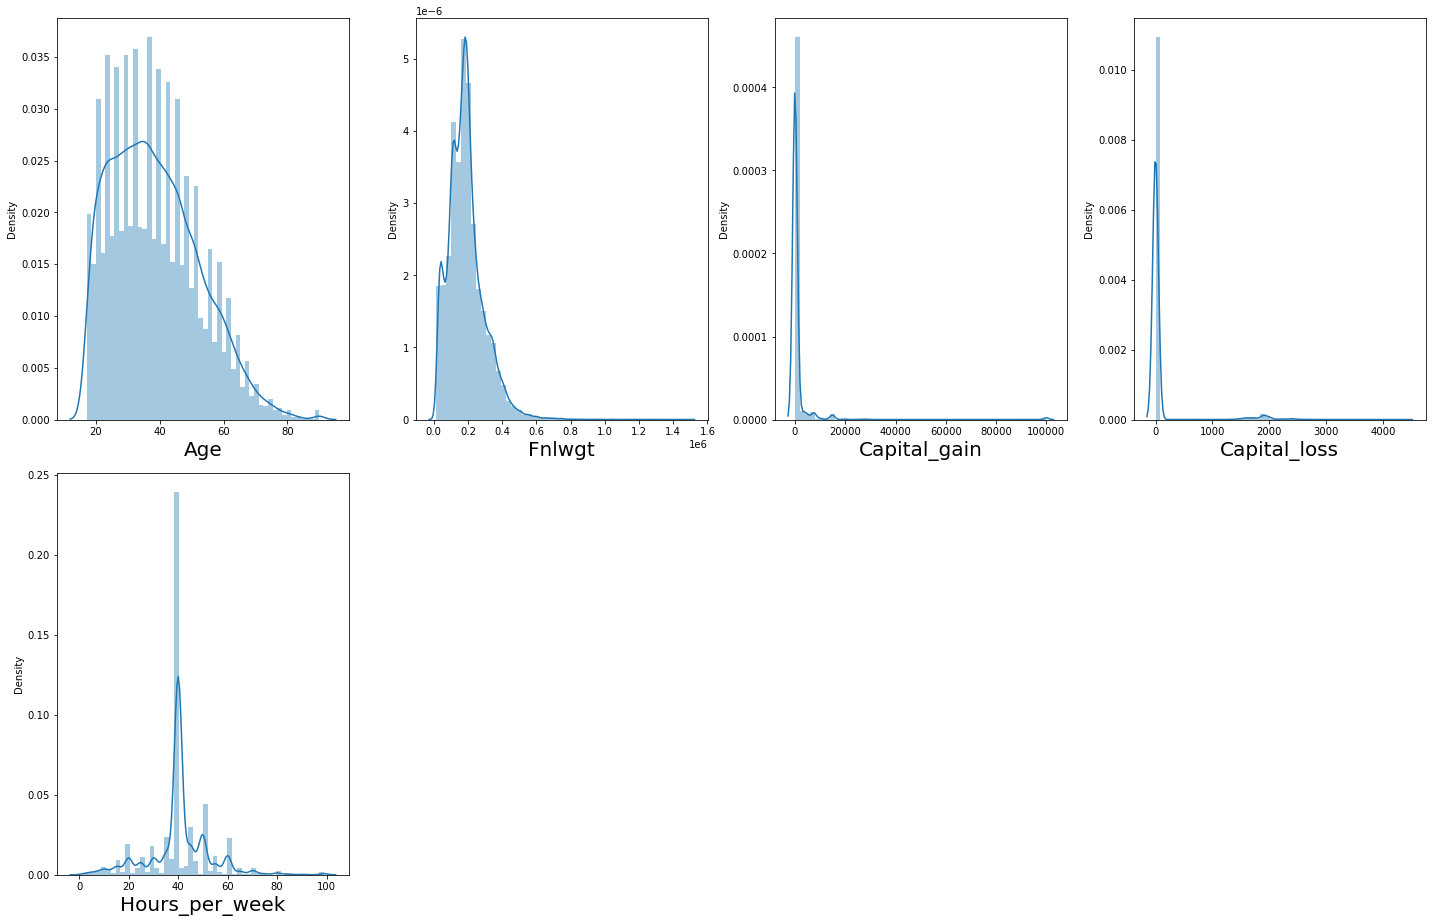

In [365]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in cnt_f:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(cnt_f[column])
        plt.xlabel(column,fontsize=20)
       
    
    plotnumber+=1
plt.tight_layout()                   
                    

In [366]:
# Left Skew

#'Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week'

# Right Skew

#'Hours_per_week','Capital_gain'

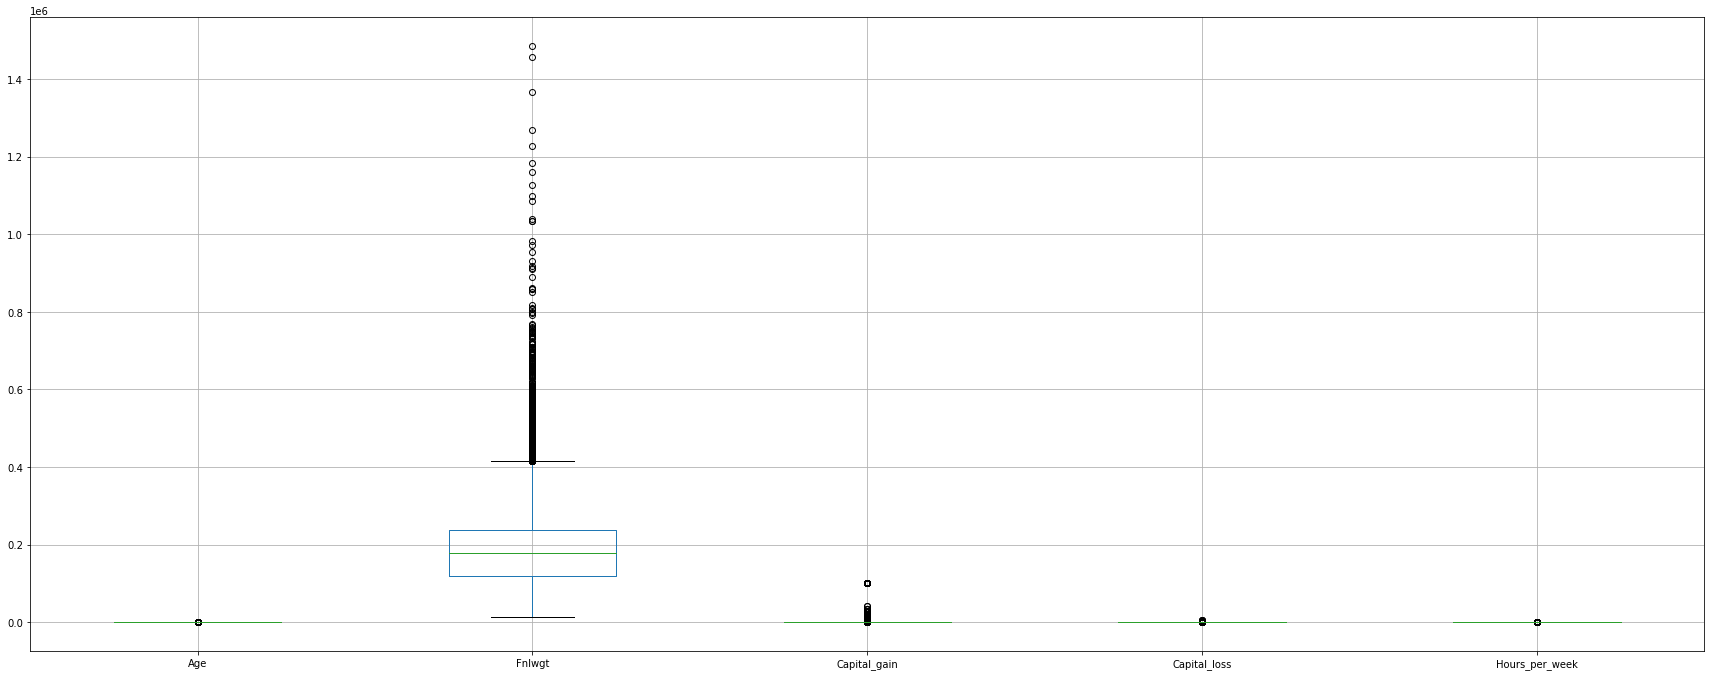

In [367]:
# #Lets check the skewness with  boxplot 
cnt_f.boxplot(figsize=[30,10],)
plt.subplots_adjust(bottom=.00000001)
plt.show()

In [368]:
# Outlier on higher Side

'Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week'

# Outlier on lower Side

'Hours_per_week','Capital_gain'


('Hours_per_week', 'Capital_gain')

In [369]:
# 1st quantile

q1=df.quantile(0.25)

#3rd quantile

q3=df.quantile(0.75)

# IQR

iqr=q3-q1

In [370]:
index=np.where(df['Age']>(q3.Age+(1.5*iqr.Age)))
df=df.drop(df.index[index])
df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32412,32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32413,32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32414,32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32415,32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [371]:
index=np.where(df['Fnlwgt']>(q3.Fnlwgt+(1.5*iqr.Fnlwgt)))
df=df.drop(df.index[index])
df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31421,32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
31422,32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
31423,32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
31424,32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [372]:
index=np.where(df['Capital_gain']>(q3.Capital_gain+(1.5*iqr.Capital_gain)))
df=df.drop(df.index[index])
df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28805,32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
28806,32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
28807,32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
28808,32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [373]:
index=np.where(df['Capital_loss']>(q3.Capital_loss+(1.5*iqr.Capital_loss)))
df=df.drop(df.index[index])
df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27323,32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
27324,32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
27325,32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
27326,32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [374]:
index=np.where(df['Hours_per_week']>(q3.Hours_per_week+(1.5*iqr.Hours_per_week)))
df=df.drop(df.index[index])
df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24573,32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
24574,32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
24575,32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
24576,32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [376]:
# checking dimention after outlier treatment 
df.shape

#(rows=24578, column=15)

(24578, 15)

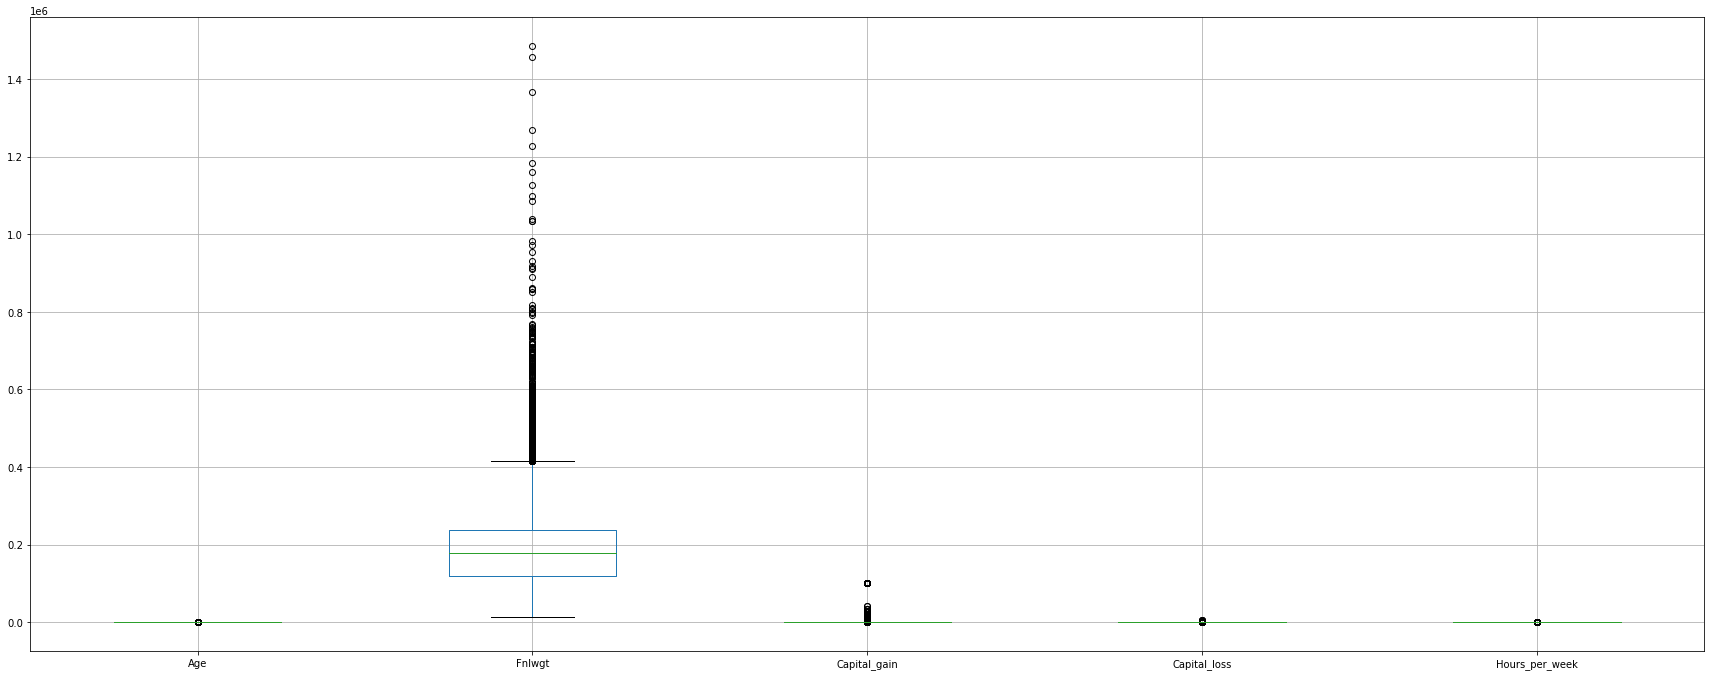

In [377]:
# Checking skew ness after boxplot outlier treatment
cnt_f.boxplot(figsize=[30,10],)
plt.subplots_adjust(bottom=.00000001)
plt.show()

In [378]:
# Now data skewedness is less as compare to earlier

In [379]:
cnt_f=df[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]

In [380]:
df_cat1=df[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Native_country','Education_num','Sex']]

In [381]:
df_cat1.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Native_country,Education_num,Sex
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,United-States,13,Male
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,United-States,9,Male
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,United-States,7,Male
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Cuba,13,Female
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,United-States,14,Female


In [382]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [383]:
ohe=OneHotEncoder()


In [384]:
df['Education'].value_counts()

 HS-grad         8268
 Some-college    5740
 Bachelors       3710
 Masters         1074
 Assoc-voc       1039
 11th             988
 Assoc-acdm       807
 10th             761
 7th-8th          497
 9th              432
 12th             368
 5th-6th          267
 Prof-school      257
 Doctorate        199
 1st-4th          131
 Preschool         40
Name: Education, dtype: int64

In [385]:
df_cat1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24578 entries, 0 to 32558
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Workclass       24578 non-null  object
 1   Education       24578 non-null  object
 2   Marital_status  24578 non-null  object
 3   Occupation      24578 non-null  object
 4   Relationship    24578 non-null  object
 5   Race            24578 non-null  object
 6   Native_country  24578 non-null  object
 7   Education_num   24578 non-null  int64 
 8   Sex             24578 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.9+ MB


In [386]:
from sklearn.preprocessing import LabelEncoder

In [387]:
#Continueous Feature
#Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week

#Categorical value
#Workclass,Education,Marital_status,Relationship,Race,Sex,Native_country,Education_num

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24578 entries, 0 to 32558
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             24578 non-null  int64 
 1   Workclass       24578 non-null  object
 2   Fnlwgt          24578 non-null  int64 
 3   Education       24578 non-null  object
 4   Education_num   24578 non-null  int64 
 5   Marital_status  24578 non-null  object
 6   Occupation      24578 non-null  object
 7   Relationship    24578 non-null  object
 8   Race            24578 non-null  object
 9   Sex             24578 non-null  object
 10  Capital_gain    24578 non-null  int64 
 11  Capital_loss    24578 non-null  int64 
 12  Hours_per_week  24578 non-null  int64 
 13  Native_country  24578 non-null  object
 14  Income          24578 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.0+ MB


In [389]:
from sklearn.preprocessing import LabelEncoder

In [390]:
lab_enc=LabelEncoder()

 <=50K    20280
 >50K      4298
Name: Income, dtype: int64

In [ ]:
df2=lab_enc.fit_transform(df['Income'])
pd.Series(df2)

In [ ]:
df['Income']=df2
df

In [411]:
#splitting the independent and target variable in x and y
y_over=df['Income']
x=df.drop(columns=['Income'])

In [412]:
# Import libraries and download example data
from sklearn.preprocessing import StandardScaler, OneHotEncoder



# Define which columns should be encoded vs scaled
columns_to_scale = ['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
columns_to_encode  = ['Workclass','Education','Marital_status','Relationship','Race','Sex','Native_country','Occupation']
# Instantiate encoder/scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
scaled_columns  = scaler.fit_transform(x[columns_to_scale]) 
encoded_columns = ohe.fit_transform(x[columns_to_encode])

# Concatenate (Column-Bind) Processed Columns Back Together
x_over = np.concatenate([scaled_columns, encoded_columns], axis=1)

In [413]:
x_over

array([[ 0.91612702, -1.11971565,  1.25211313, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02920268,  0.39808813, -0.35476021, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.1378581 ,  0.61686704, -1.15819689, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.17702341, -0.30466529, -0.35476021, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.50740991, -0.3329259 , -0.35476021, ...,  0.        ,
         0.        ,  0.        ],
       [-1.1533631 ,  0.23572722, -0.35476021, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
# Model Development

In [414]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test =train_test_split(x_over,y_over,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)


Best accuracy is 0.8723894765391917 on Random_state 84


In [ ]:
#Best accuracy is 0.8723894765391917 on Random_state 84

In [415]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8639815568212639
[[5733  331]
 [ 672  638]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      6064
           1       0.66      0.49      0.56      1310

    accuracy                           0.86      7374
   macro avg       0.78      0.72      0.74      7374
weighted avg       0.85      0.86      0.86      7374



In [416]:
import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb.fit(x_train,y_train)
predxgb=xgb.predict(x_test)
print(accuracy_score(y_test,predxgb))
print(confusion_matrix(y_test,predxgb))
print(classification_report(y_test,predxgb))

[18:29:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8619473826959587
[[5699  365]
 [ 653  657]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6064
           1       0.64      0.50      0.56      1310

    accuracy                           0.86      7374
   macro avg       0.77      0.72      0.74      7374
weighted avg       0.85      0.86      0.86      7374



In [417]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8519121236777868
[[5675  389]
 [ 703  607]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6064
           1       0.61      0.46      0.53      1310

    accuracy                           0.85      7374
   macro avg       0.75      0.70      0.72      7374
weighted avg       0.84      0.85      0.84      7374



In [418]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8106861947382696
[[5372  692]
 [ 704  606]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      6064
           1       0.47      0.46      0.46      1310

    accuracy                           0.81      7374
   macro avg       0.68      0.67      0.67      7374
weighted avg       0.81      0.81      0.81      7374



In [419]:
from sklearn.ensemble import AdaBoostClassifier
Ada=AdaBoostClassifier()
Ada.fit(x_train,y_train)
predAda=Ada.predict(x_test)
print(accuracy_score(y_test,predAda))
print(confusion_matrix(y_test,predAda))
print(classification_report(y_test,predAda))

0.8666937889883374
[[5747  317]
 [ 666  644]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      6064
           1       0.67      0.49      0.57      1310

    accuracy                           0.87      7374
   macro avg       0.78      0.72      0.74      7374
weighted avg       0.86      0.87      0.86      7374



In [ ]:
#Cross Validation

In [420]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR,x_over,y_over,cv=5)
print("Cross Validation Score fo Logistic Regression :",scr.mean())

Cross Validation Score fo Logistic Regression : 0.8645132426184106


In [421]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(xgb,x_over,y_over,cv=5)
print("Cross Validation Score fo XGB :",scr.mean())

[18:33:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:33:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:33:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:33:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [422]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf,x_over,y_over,cv=5)
print("Cross Validation Score fo rf :",scr.mean())

Cross Validation Score fo rf : 0.8572708460426105


In [423]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt,x_over,y_over,cv=5)
print("Cross Validation Score fo dt :",scr.mean())

Cross Validation Score fo dt : 0.8159331416836423


In [ ]:
      Model Accuracy      Cross Validation Score      Diff
LR     86                         83                  3
DT     81                         81                  0
RF     85                         86                  1
Ada    87                         86                  1
Xgb    86                         86                  0

Since diff is 0 with high model accuracy for RF,It is the best model 

In [ ]:
#Hyper parameter tuning

In [426]:
# Need to give range for max_depth,min_samples_split,min_samples_leaf and more criterion.No fixed param,params should go for variours 
#combination to get higher acccuracy.

#Base estimatotors for Random forest is decesion tree

params ={'n_estimators':[13,15],
       'criterion':['entropy'],
       'max_depth':[10],
       'min_samples_split':[10,11],
       'min_samples_leaf':[5,6]}

grd = GridSearchCV(rf,param_grid=params)
grd.fit(x_train,y_train)
print('best_params =>', grd.best_params_)

rf=grd.best_estimator_ # reinstantiating with best params
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

fr_conf_mat= confusion_matrix(y_test,y_pred)
print('conf_mat =>','\n',fr_conf_mat)

print('Accuracy rf Normal =====>',accuracy_score(y_test,y_pred))

#x_train,x_test,y_train

best_params => {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 13}
conf_mat => 
 [[5862  202]
 [ 835  475]]
Accuracy rf Normal =====> 0.859370762137239


In [ ]:
import pickle

# writing diffrent model files to file

with open('modelForPrediction.sav','rf') as f:
    pickle.dump(rf,f)
    
with open ('SandardScalar.sav','rf') as f:
    pickle.dump(scalar,f)